### Library yang Dibutuhkan

In [1]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Cleansing

In [3]:
# memanggil data

df=pd.read_csv('/content/drive/MyDrive/Pacmann/P. A B Testing/marketing_AB.csv')

In [4]:
# menampilkan 5 baris pertama dari data

df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
# menampilkan 5 baris terakhir dari data

df.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


Kolom Unnamed hanya berisi index data yang tidak diperlukan, dapat kita hapus.

In [6]:
# Hapus kolom 'Unnamed'

df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [8]:
# Melihat jumlah kolom dan baris dari dataset

df.shape

(588101, 6)

In [9]:
# Menampilkan informasi seputar tipe data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


Terdapat 6 fitur dalam data, 4 diantaranya integer, 2 fitur string, dan boolean untuk fitur converted.

In [10]:
# Untuk memudahkan penulisan code, lebih baik mengganti spasi menjadi underscores ('_')

df.rename(columns=lambda x: x.strip().replace (" ", "_"), inplace=True)
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [11]:
# Mengecek missing value

df.isnull().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [12]:
# Mengecek Duplikasi data

df.duplicated().sum()

0

Tidak terdapat missing value, dan duplikat dalam dataset. Sehingga data sudah siap untuk diolah.

### Exploratory Data Analysis

In [13]:
# Melihat nilai stastics dari kolom numerik

df.describe()

,user_id,total_ads,most_ads_hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [14]:
# Melihat jumlah setiap kelompok dalam test group

rows_by_test_group = df.groupby(['test_group'])['user_id'].nunique()
print(rows_by_test_group)

test_group
ad     564577
psa     23524
Name: user_id, dtype: int64


Kelompok ads jauh lebih besar dari psa dalam test group

In [15]:
# Calculate conversion rates

df.groupby("test_group")["converted"].mean()*100

test_group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64

Kelompok ads memiliki conversion rate lebih tinggi dari psa. Ini mengindikasikan bahwa ads lebih sukses dalam menghasilkan convertion daripada psa.

converted    False  True 
test_group               
ad          550154  14423
psa          23104    420


<Axes: xlabel='test_group'>

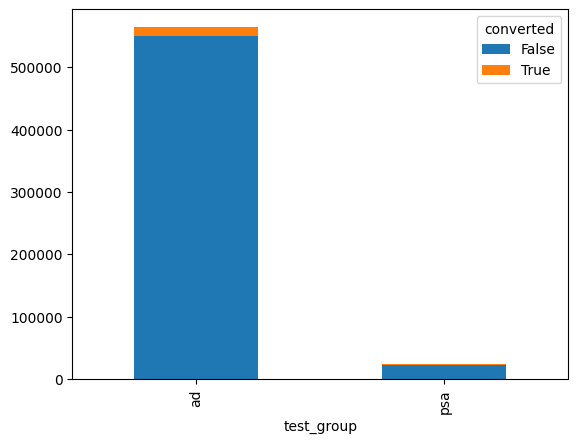

In [16]:
print(df.groupby("converted")["test_group"].value_counts().unstack('converted'))

df.groupby("converted")["test_group"].value_counts().unstack('converted').plot(kind="bar", stacked=True)

Melihat perbandingan hari dan konversi

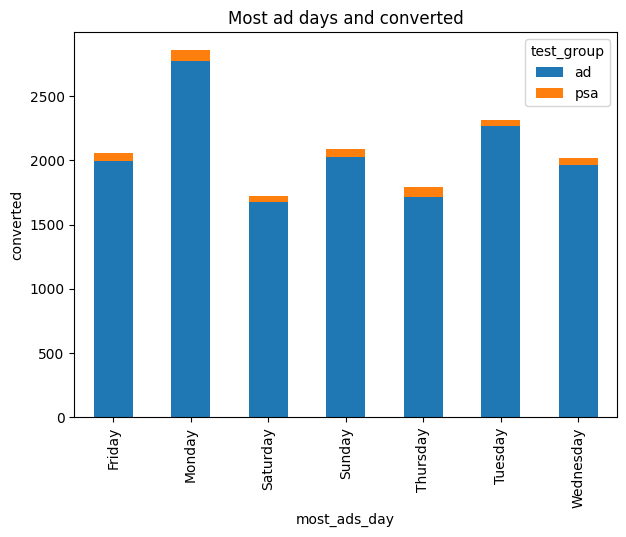

In [17]:
# print(df.groupby("most_ads_day")["converted"].sum())

ax =df.groupby(by =['most_ads_day', 'test_group']).sum()['converted'].unstack('test_group').plot(kind='bar', figsize=(7,5), stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

Hari Senin (Monday) adalah hari paling bagus untuk ber iklan.

Melihat perbandingan jam iklan dan konversi

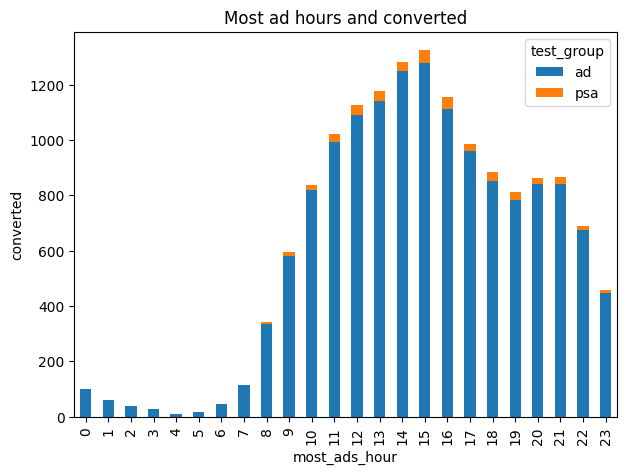

In [18]:
# print(df.groupby("most_ads_hour")["converted"].sum())

ax = df.groupby(by =['most_ads_hour', 'test_group'])['converted'].sum().unstack('test_group').plot(kind= 'bar', figsize= (7,5), stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad hours and converted')
plt.show()

Terlihat bahwa antara jam 10 hingga jam 18 adalah waktu terbaik untuk ber iklan dengan puncaknya adalah pada jam 15.

### A/B Testing

In [19]:
#Mencari nilai standar deviasi dari data

df.std()

<ipython-input-19-fe3bcf742091>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


user_id          202225.983128
converted             0.156850
total_ads            43.715181
most_ads_hour         4.834634
dtype: float64

In [20]:
delta = 0.01            # absolute increase of two groups means
alpha = 0.05            # significance level
power = 0.8             # power
std_dev = 0.156850      # variance of population

In [21]:
# menghitung beta
beta = 1 - power
beta

0.19999999999999996

In [22]:
# menghitung z value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

z_alpha, z_beta

(1.959963984540054, 0.8416212335729143)

In [23]:
# menghitung sample size
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)

print(f"Sample size yang dibutuhkan adalah    : {n:.2f}")
print(f'Jumlah sampel yang dibutuhkan per grup: {round(n)}')
print(f'Jumlah sampel yang dibutuhkan untuk seluruh grup: {round(2*n)}')

Sample size yang dibutuhkan adalah    : 3861.95
Jumlah sampel yang dibutuhkan per grup: 3862
Jumlah sampel yang dibutuhkan untuk seluruh grup: 7724


In [24]:
# Menghitung Jumlah Sampel per Grup

df_control = df[df['test_group']=='psa']
df_treatment = df[df['test_group']=='ad']

n_control = df_control.shape[0]
n_treatment = df_treatment.shape[0]

n_control, n_treatment

(23524, 564577)

In [25]:
# Mendapatkan banyak sampel yang converted berdasarkan grup

n_control_convert = df_control[df_control['converted']== True].shape[0]
n_treatment_convert = df_treatment[df_treatment['converted']== True].shape[0]

n_control_convert, n_treatment_convert

(420, 14423)

In [26]:
count_control_convert=[n_control_convert]
count_treatment_convert=[n_treatment_convert]

count_control_convert, count_treatment_convert

([420], [14423])

In [27]:
# Mendapatkan nilai conversion rate berdasarkan grup

re_control = n_control_convert/n_control
re_treatment = n_treatment_convert/n_treatment

re_control, re_treatment

(0.01785410644448223, 0.025546559636683747)

In [28]:
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = n_treatment, nobs1 = n_treatment,
                                                 count2 = n_control, nobs2 = n_control,
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(-6.804089934919766e-06, 0.00016327289638606857)


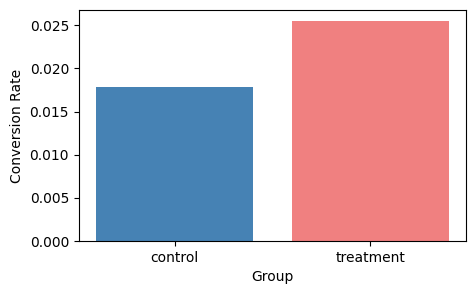

In [29]:
# visualisasi conversion rate
# visualisasi perbandingan conversion rate tiap varian

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

# Buat plot
ax.bar("control", re_control, color="steelblue", label="Control")
ax.bar("treatment", re_treatment, color="lightcoral", label="Treatment")

# Styling plot
ax.set_ylabel("Conversion Rate", fontsize=10)
ax.set_xlabel("Group", fontsize=10)

plt.show()

Hipotesis dari eksperimen ini adalah:

H0: Ad = PSA, tidak ada perbedaan antara campaign dengan Ad maupun dengan PSA. Dalam hal ini, conversion rate antara Ad sama dengan conversion rate dengan PSA

H1: Ad > PSA, campaign dengan Ad lebih baik dibandingkan dengan PSA. Dalam hal ini, conversion rate dengan Ad lebih tinggi dibandingkan conversion rate dengan PSA.

In [30]:
# Menghitung Efek Relatif

relative_effect = (re_treatment - re_control)/re_control * 100
print(f"relatife effect = {relative_effect:.3} %")

relatife effect = 43.1 %


In [31]:
# Membuat count convert & total observation

count_convert = [n_treatment_convert,n_control_convert]
count_observation = [n_treatment,n_control]
alternative_option = 'larger'

In [32]:
# Panggil fungsi

z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 7.3701
P-value : 0.0000


In [33]:
# Dari p-value
alpha = 0.05        # confidence level yang kita set

# Buat decision berdasarkan p_value dan alpha
if p_value < alpha:
    print("Tolak H0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H0")

Tolak H0


In [34]:
# Z critical adalah z-value saat alpha
import scipy.stats as stats
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z_critical

1.6448536269514722

In [35]:
# Dari z-statistics
# Buat decision berdasarkan z_critical dan alpha

if z_stat > z_critical:
    print("Tolak H0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H0")

Tolak H0


In [36]:
df.groupby('test_group')['converted'].value_counts()

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: converted, dtype: int64

In [37]:
# Mencari nilai sample obs

group=['control','treatment']
size=[23524, 564577]
df_sample=pd.DataFrame({'group':group, 'size_obs':size})
df_sample

,group,size_obs
0,control,23524
1,treatment,564577


In [38]:
# Mencari nilai sample expected

df_sample['size_exp']=sum(df_sample['size_obs'])/2
df_sample

,group,size_obs,size_exp
0,control,23524,294050.5
1,treatment,564577,294050.5


### Uji Sample Ratio Mismatches (SRMs)

Kita dapat menggunakan chi square untuk melihat apakah ada bias dalam dataset

In [39]:
# Menghitung nilai chi square

alpha=0.05
dof=(2-1)*(2-1)
chi_sqr=[((df_sample['size_obs']-df_sample['size_exp'])**2)/df_sample['size_exp']][0].sum()
chi_sqr

497768.8336000109

In [40]:
# Pengecekan SRM berdasarkan chi square

chi_sqr_critical=stats.chi2.ppf(1-alpha, df=dof)
print("chi_sqr_critical",chi_sqr_critical)
print("chi_sqr",chi_sqr)
if chi_sqr > chi_sqr_critical:
    print("Tolak H0: Terjadi SRM")
else:
    print("Gagal tolak H0: Tidak terjadi SRM")

chi_sqr_critical 3.841458820694124
chi_sqr 497768.8336000109
Tolak H0: Terjadi SRM


In [41]:
# Pengecekan SRM berdasarkan P Value

p_val=stats.chi2.sf(chi_sqr, df=dof)
print("P Value", p_val)
print("significance level", alpha)
if p_val < alpha:
    print("Tolak H0: Terjadi SRM")
else:
    print("Gagal tolak H0: Tidak terjadi SRM")

P Value 0.0
significance level 0.05
Tolak H0: Terjadi SRM


### Kesimpulan

Kelompok iklan menghasilkan convertion rate yang lebih tinggi (2.62%) dibandingkan dengan PSA (1.81%.). Hal ini mengindikasikan bahwa iklan lebih effektif dibandingkan dengan PSA dalam meningkatkan convertion rate.

Angka T-test P-value pada 0.0000 mengindikasikan bahwa perbedaan antara kedua grup tersebut secara statistik adalah signifikan. Yang artinya kecil kemungkinan untuk hasil tersebut terjadi secara kebetulan. Sehingga kita memiliki cukup bukti secara statistik.

Dan dapat disimpulkan bahwa perbedaan dalam convertion rates tersebut benar-benar merupakan dampak dari iklan.